In [1]:
import asdf
import numpy as np
with asdf.open('/mnt/home/lgarrison/ceph/multicosmo-viz/traj.asdf') as af:
    traj = af['data']
p = traj['pos']
p = np.moveaxis(p, [1,2], [2,0])
w = 30.

In [64]:
# first axis is particles
import ahlive as ah
xs = np.zeros((4,3))
xs += np.arange(3)
xs += np.arange(len(xs)).reshape(-1,1)
ys = np.zeros((len(xs),3))
ys += np.arange(3)

ah.Array(xs, ys, chart="scatter").render()

ValueError: conflicting sizes for dimension 'state': length 4 on 'chart' and length 3 on {'item': 'x', 'state': 'x'}

In [24]:
overlay

<ahlive.Data>
Subplot:         (1, 1)
Dimensions:      (item: 1000, state: 95)
Data variables:
    x        (item, state) float64 9.447 9.395 9.309 10.14 ... 10.9 13.03 10.25
    y        (item, state) float64 3.016 3.432 2.474 3.51 ... 6.066 8.616 4.994
    color    (item, state) object 'red' 'red' 'red' 'red' ... 'red' 'red' 'red'
    chart    (item) <U7 'scatter' 'scatter' 'scatter' ... 'scatter' 'scatter'
    label    (item, state) object '' '' '' '' '' '' '' ... '' '' '' '' '' '' ''
    group    (item) <U1 '' '' '' '' '' '' '' '' '' ... '' '' '' '' '' '' '' ''
Attributes (6/49):
    pool_kwds    {'max_workers': 12}
    animate_kwds {'fps': 12}
    interpola... {'frames': 6}
    legend_kwds  {'show': False}
    limits_kwds  {'xlims': (0, 30.0), 'ylims': (0, 30.0)}
    hooks_kwds   {'hooks': [<function hook at 0x7fd6b1966d30>]}


In [ ]:
del fig, ax

In [22]:
import ahlive as ah
import numpy as np

def hook(fig, ax):
    ax.set_aspect('equal')

NP = 1000 #p.shape[1]

arrays = []
for i in range(NP):
    arr = ah.Array(xs=p[0,i], ys=p[1,i], xlims=(0,w), ylims=(0,w), chart="scatter", fps=(fps:=12), frames=fps//2, workers=12,
            color='red', legend=False,
            #animate=False, save='/mnt/home/lgarrison/ceph/multicosmo-viz/ahlive_frames/',
            hooks=[hook],
        )
    arrays += [arr]
overlay = ah.overlay(arrays)
#arr.config('axes', aspecta='equal')
#overlay.render()

In [11]:
df.melt()

,variable,value
0,x,-1
1,x,-2
2,x,-3
3,x,-4
4,y,2
5,y,3
6,y,4
7,y,5
8,z,5
9,z,-5


In [13]:
ah_df

<ahlive.Data>
Subplot:         (1, 1)
Dimensions:      (item: 4, state: 2)
Data variables:
    x            (item, state) float64 -1.0 -1.0 -2.0 -2.0 -3.0 -3.0 -4.0 -4.0
    y            (item, state) float64 2.0 5.0 3.0 -5.0 4.0 -10.0 5.0 -11.0
    color        (item, state) object 'blue' 'blue' 'blue' ... 'blue' 'blue'
    chart        (item) object 'scatter' 'scatter' 'scatter' 'scatter'
    label        (item) <U1 '' '' '' ''
    group        (item) object '' '' '' ''
    state_label  (state) object 'y' 'z'
Attributes (3/49):
    legend_kwds  {'show': False}
    xlabel_kwds  {'xlabel': 'X'}
    ylabel_kwds  {'ylabel': 'Value'}


/mnt/home/lgarrison/abacus-analysis/AbacusSummit/venv/lib/python3.9/site-packages/ahlive/animation.py:1949: UserWarning: pip install pygifsicle to reduce size of output gif! To disable this warning, set pygifsicle=False 
  warnings.warn(



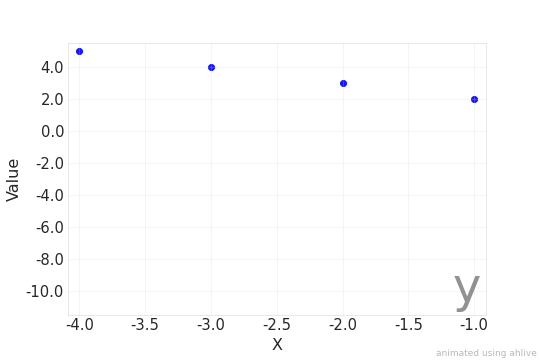

In [12]:
import ahlive as ah
import pandas as pd

df = pd.DataFrame({'x': [-1, -2, -3, -4], 'y': [2, 3, 4, 5], 'z': [5, -5, -10, -11]})
df = df.melt('x')
ah_df = ah.DataFrame(df, 'x', 'value', label='variable', legend=False, color='blue').invert()
ah_df.render()